# Visualizing Spatial Data

```{image} ../_static/images/arcgisapi.png
:class: mb-3
:alt: arcgisapi
:scale: 30%
:align: right
```

## 1. ArcGIS API for Python

The ArcGIS API for Python, i.e., the `arcgis` package, is a powerful,
modern and easy to use Pythonic library to perform GIS **visualization**
and analysis, spatial data management and GIS system administration tasks
that can run both in an interactive fashion, and using scripts.

The package is shipped with a standard ArcGIS Pro installation.
The API is distributed as the `arcgis` package via conda and pip.
Within the `arcgis` package, which represents the generic **GIS model**,
functionality is organized into a number of different modules that makes it
simple to use and understand. Each module has a handful of types and functions
that are focused towards one aspect of the GIS.

This diagram below depicts the modules present in the API.

In [1]:
%%html
<iframe width="560" height="315"
src="https://www.youtube.com/embed/irpubkYLrWI"
title="YouTube video player" frameborder="0"
allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen>
</iframe>

### 1.1 Import the package

The following statement imports the `arcgis` library and several submodules
that we use for to plotting maps in a Python Notebook.

In [2]:
import arcgis
from arcgis import GIS, GeoAccessor, GeoSeriesAccessor, pd

### 1.2 The `arcgis.GIS` class

What is **_class_** in Python?

- It is a blueprint for building things (a machine produces products)
- Things get created from the class are called objects (or instances of the class)
- DRY (Don't repeat yourself) code.
- Example classes: a college student or a car, or a data structure that organizes
  the data just as `np.ndarray` and `pd.DataFrame`.

What is **GIS** (Geographic Information System)?

- Geographic Data:
    - collection
    - storage
    - manipulation
    - analysis
    - visualization
    - management/administration
    - distribution
- A variety of technologies:
    - human activities (such as conducting survey of an area of land)
    - hardware
    - software (a narrower definition of GIS)

The `arcgis.GIS`:

- a portal to do GIS in Python Notebooks
- can link to an ArcGIS Online account
- or, be used locally without the connection

## 2. Spatially Enabled DataFrame

A Spatially Enabled DataFrame (SEDF) is a special type of `pd.DataFrame` that is
part of the ArcGIS API for Python. It allows you to work with and analyze spatial
data in Python, using the power of the Pandas library.

It is a class defined in the _features_ module of _arcgis_ (`arcgis.features`).
It contains types and functions for working with features and feature layers in the GIS.
Since it is an extension of `pd.DataFrame` class, meaning that it possesses all
functions of a normal `DataFrame`.

We use ArcPy as the geometry engine for this module, which gives us access to all native
GIS data ArcGIS Pro supports.

Now, let's see how we can load a feature class as a "SEDF."

In [1]:
from arcgis import pd, GeoAccessor, GeoSeriesAccessor
import arcpy

gdb_worksp = r"..\data\class_data.gdb"
arcpy.env.workspace = gdb_worksp
blkgrp_fc = "blockgroups"

In [4]:
blkgrp_sedf = pd.DataFrame.spatial.from_featureclass(blkgrp_fc)
blkgrp_sedf.head()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,...,DEN_NOTWEL,DEN_NOTATA,PCT_OWN5,PCT_RENT5,PCT_BACHLR,PCT_POV,PCT_RU1,DATAYEAR,DESCRIPT,SHAPE
0,1,12,023,110903,2,120231109032,Block Group 2,G5030,S,57546992.0,...,0.004918,0.000000,17.225951,62.878788,9.922481,23.488372,23.488372,"REDISTRICTING, SF1, ACS 2010",120231109032,"{""rings"": [[[530441.2199999988, 651631.75], [5..."
1,2,12,023,110904,1,120231109041,Block Group 1,G5030,S,85591551.0,...,0.000329,0.000329,26.212320,58.015267,5.456656,4.102167,4.102167,"REDISTRICTING, SF1, ACS 2010",120231109041,"{""rings"": [[[534712.1700000018, 663369.54], [5..."
2,3,12,007,000300,5,120070003005,Block Group 5,G5030,S,196424609.0,...,0.000021,0.000000,13.270142,68.181818,1.254613,10.701107,10.701107,"REDISTRICTING, SF1, ACS 2010",120070003005,"{""rings"": [[[567924.9299999997, 665800.79], [5..."
3,4,12,007,000300,4,120070003004,Block Group 4,G5030,S,16339411.0,...,0.000000,0.000000,18.924731,73.711340,12.617839,14.902103,14.902103,"REDISTRICTING, SF1, ACS 2010",120070003004,"{""rings"": [[[588576.3599999994, 644359.46], [5..."
4,5,12,007,000300,1,120070003001,Block Group 1,G5030,S,57089369.0,...,0.000000,0.001138,22.957198,43.333333,1.134021,21.161826,21.161826,"REDISTRICTING, SF1, ACS 2010",120070003001,"{""rings"": [[[576256.1799999997, 656541.8300000..."


In [5]:
print(len(blkgrp_sedf))
print(blkgrp_sedf.shape)

178

In [7]:
blkgrp_sedf['TOTALPOP'].values

array([2094, 2269, 1305, 1991, 2056, 1410, 1890, 2510, 1150, 1856, 1455,
       1905, 2703,  865, 1735, 2330,  979, 1169, 2186, 3172,  163, 2175,
       2139, 2162,  999, 2124, 2278, 1600,  323, 2558, 2452, 1814, 4757,
       3260,  710,  911, 1391,  866, 2755,  798, 1937, 1166, 1246, 2329,
        924, 1779,  885,  665,  803,  844, 1418,  770, 1430,  568, 1193,
       1440,  777, 1806,  821, 1627, 1347, 1058, 2112, 1391, 1502, 1232,
       3088, 1077, 1174, 1155, 1582, 1130,  625, 1165, 1090, 1210, 2285,
       2171, 1604, 1957,  620, 1091, 1196,  642, 3589, 1433, 2906, 1930,
       5398, 1414, 1033,  993, 1345, 1482,  787, 1157, 1962, 1658, 1570,
       1973, 3617, 1270, 2497, 1522, 1356, 2877, 1323, 1741,  682,  833,
       1364,  895, 2482,  962,  838, 2136, 1567, 1255, 2030, 1269, 1154,
       1488, 2180,  703, 1066, 1861, 1515, 2027, 1061, 1067, 1851, 1614,
       1363, 1779, 1685, 1784,  696,  866, 1638, 1684, 3282, 1462,  386,
       2040,  662, 3641, 1431,  718, 2888, 1846, 25

## 3. Visualizing spatial data

### 3.1 Create a map object

Before we can create a map, we need to set up a GIS instance that is connected
to your ArcGIS Online account.

In [30]:
my_gis = GIS()

In [31]:
my_gis

GIS @ https://www.arcgis.com version:2023.1

Then, we can prepare SEDFs  Loading data into the GIS instance

In [5]:
import arcpy
gdb_worksp = r"..\data\class_data.gdb"
arcpy.env.workspace = gdb_worksp

blkgrp = "blockgroups"
schools = 'schools'

In [6]:
blkgrp_sedf = pd.DataFrame.spatial.from_featureclass(blkgrp)
schools_sedf = pd.DataFrame.spatial.from_featureclass(schools)

Use the `map()` function to create a **map widget** from the `GIS` instance to create a map.

The `location` parameter takes a list of coordinates. And `zoomlevel` dictates
how "zoomed-in" the map will be displayed initially. It is a value ranged between `0` (world)
to `23` (house). Check this
[link](https://developers.arcgis.com/documentation/mapping-apis-and-services/reference/zoom-levels-and-scale/#conversion-tool)
to learn more.

In [10]:
my_map_in_my_gis = my_gis.map(location=[29.7, -82.3],
                              zoomlevel=9)

In [41]:
my_map_in_my_gis

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

```{image} ../_static/images/mapwidget.png
:class: mb-3
:alt: mapwidget
```

### 3.2 Load SEDFs into the MapWidget

Call `spatial.plot()` and specify the `map_widget` parameter to add the layer
to a specific map.
Note that SEDF loaded later will **overlap** the SEDFs loaded earlier.

In [42]:
blkgrp_sedf.spatial.plot(map_widget=my_map_in_my_gis)

True

In [43]:
schools_sedf.spatial.plot(map_widget=my_map_in_my_gis,
                          col='NAME', 
                          renderer_type='u')

True

In [45]:
my_map_in_my_gis

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

```{image} ../_static/images/mapwidget_layers.png
:class: mb-3
:alt: mapwidget-layers
```

### 3.3 Modify the size of the widget window

In [46]:
from ipywidgets import Layout

In [50]:
my_map_in_my_gis.layout = Layout(height="600px")
my_map_in_my_gis

MapView(jupyter_target='notebook', layout=Layout(height='600px'), ready=True)

```{image} ../_static/images/mapwidget_height.png
:class: mb-3
:alt: mapwidget-height
```

In [51]:
my_map_in_my_gis.layout = Layout(width="600px", height="600px")
my_map_in_my_gis

MapView(jupyter_target='notebook', layout=Layout(height='600px', width='600px'), ready=True)

```{image} ../_static/images/mapwidget_width_height.png
:class: mb-3
:alt: mapwidget-width-height
:scale: 70%
```

### 3.3 Change the Basemap

1. `basemaps` attribute of a `map` returns a list of available basemaps

In [58]:
my_map_in_my_gis.basemaps

['dark-gray-vector',
 'gray-vector',
 'hybrid',
 'oceans',
 'osm',
 'satellite',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo-vector',
 'arcgis-imagery',
 'arcgis-imagery-standard',
 'arcgis-imagery-labels',
 'arcgis-light-gray',
 'arcgis-dark-gray',
 'arcgis-navigation',
 'arcgis-navigation-night',
 'arcgis-streets',
 'arcgis-streets-night',
 'arcgis-streets-relief',
 'arcgis-topographic',
 'arcgis-oceans',
 'osm-standard',
 'osm-standard-relief',
 'osm-streets',
 'osm-streets-relief',
 'osm-light-gray',
 'osm-dark-gray',
 'arcgis-terrain',
 'arcgis-community',
 'arcgis-charted-territory',
 'arcgis-colored-pencil',
 'arcgis-nova',
 'arcgis-modern-antique',
 'arcgis-midcentury',
 'arcgis-newspaper',
 'arcgis-hillshade-light',
 'arcgis-hillshade-dark',
 'arcgis-human-geography',
 'arcgis-human-geography-dark']

Pick a basemap from the above list and assign it to the `basemap` attribute to
the map widget.

In [52]:
my_map_in_my_gis.basemap = 'dark-gray-vector'
my_map_in_my_gis

MapView(jupyter_target='notebook', layout=Layout(height='600px', width='600px'), ready=True)

```{image} ../_static/images/mapwidget_dark.png
:class: mb-3
:alt: mapwidget-dark
:scale: 70%
```

### 3.4 Choropleth Map

A choropleth map is a type of thematic map that uses color to represent
a quantitative variable (e.g., population) for different geographic regions,
such as countries, states, or counties.

In a choropleth map, each region is shaded or colored based on its corresponding
value for the variable being mapped. Regions with higher values are typically
shaded with darker or more intense colors, while regions with lower values are
shaded with lighter or less intense colors.

ArcGIS Python API provides a series of **color maps** to plot features on maps. 

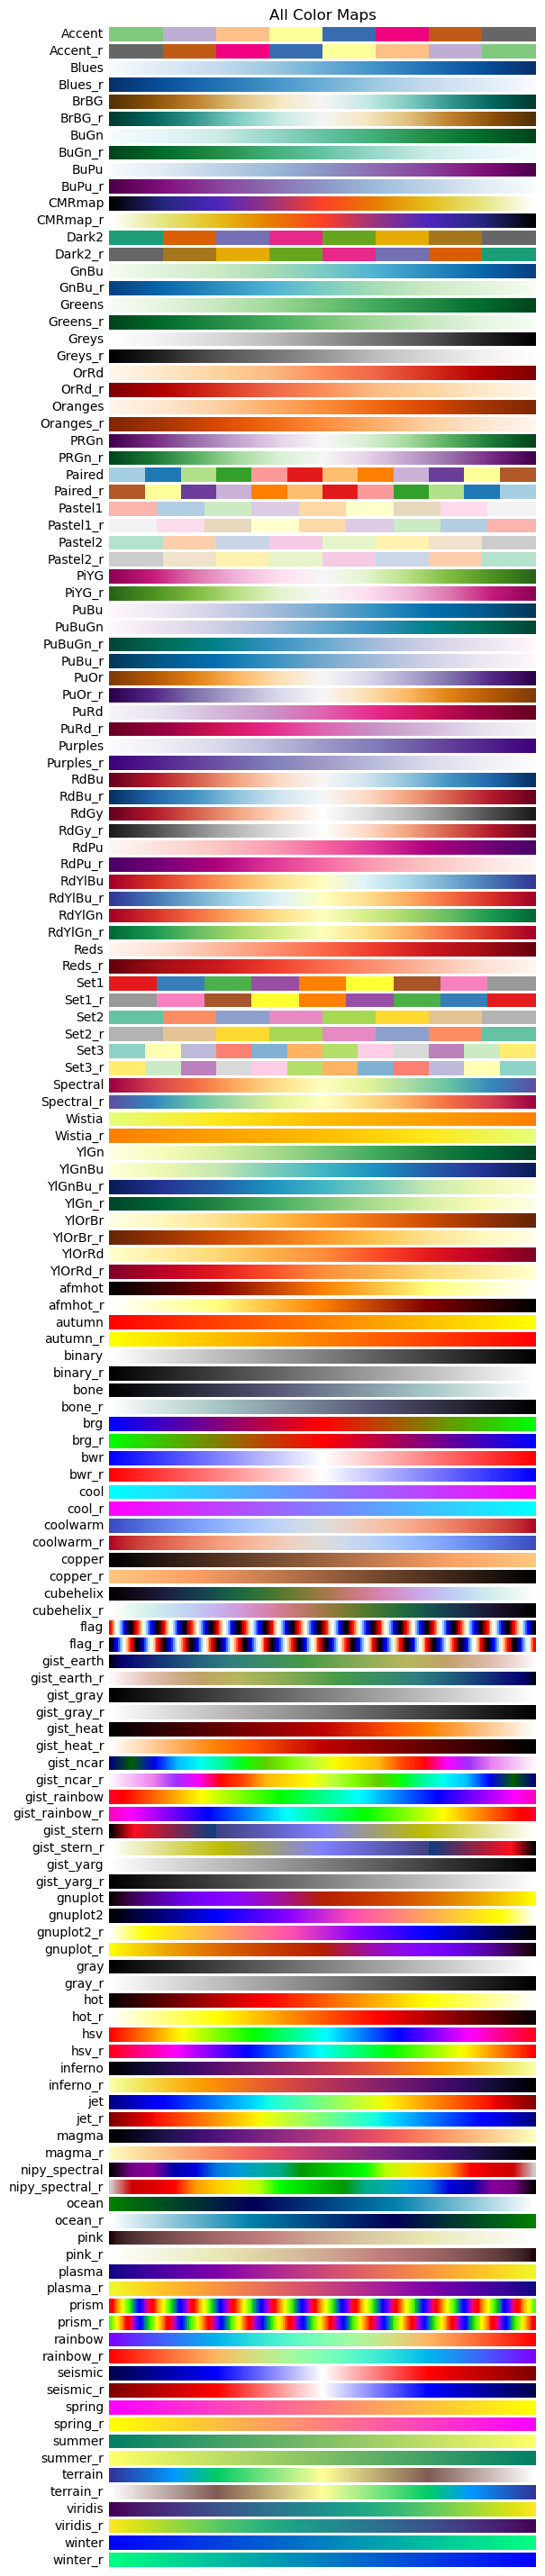

In [57]:
from arcgis import mapping

mapping.display_colormaps()

In [65]:
map2 = my_gis.map(location=[29.7, -82.3], zoomlevel=9)

In [66]:
blkgrp_sedf.spatial.plot(map_widget=map2,
                         colors="YlGnBu",
                         col='TOTALPOP',
                         renderer_type='c',
                         method='esriClassifyNaturalBreaks',
                         class_count=7)
map2.layout = Layout(height="700px")
map2.basemap = "dark-gray-vector"
map2

MapView(layout=Layout(height='700px'))

```{image} ../_static/images/mapwidget_choropleth.png
:class: mb-3
:alt: mapwidget-choropleth
```